In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

# Data Preparation For the Convolutional Neural Network

In [3]:
Train_no=1
engine_id=50


df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df = df.drop(columns=['ID'])

df

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
9711,1,642.12,1582.50,1400.44,553.76,2388.05,47.31,521.97,2388.08,8.4366,394,38.96,23.3947,197
9712,2,642.62,1589.90,1404.14,554.52,2388.02,47.31,522.27,2388.02,8.4211,394,38.91,23.4594,196
9713,3,642.55,1582.75,1403.42,554.26,2388.04,47.41,522.40,2388.04,8.3931,392,38.97,23.3230,195
9714,4,642.61,1586.91,1403.46,554.56,2388.05,47.46,522.25,2388.08,8.4286,393,38.91,23.3886,194
9715,5,642.41,1589.70,1401.43,554.26,2388.05,47.33,522.10,2388.00,8.4295,394,38.98,23.3340,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9904,194,643.77,1604.93,1423.51,551.41,2388.18,48.16,519.85,2388.19,8.5043,396,38.42,23.0543,4
9905,195,643.33,1605.31,1434.87,551.25,2388.17,48.14,519.33,2388.21,8.5352,395,38.45,23.0191,3
9906,196,643.32,1602.26,1430.01,551.40,2388.19,48.24,519.88,2388.17,8.5034,395,38.45,23.0379,2
9907,197,643.73,1599.94,1432.87,551.18,2388.19,48.22,519.48,2388.20,8.5241,397,38.52,23.0832,1


In [4]:
################################## Scalling the DATA
scaler=MinMaxScaler()
df = scaler.fit_transform(df)
print('Shape of df for engine {}: '.format(engine_id),df.shape)
df

Shape of df for engine 50:  (198, 14)


array([[0.        , 0.14222222, 0.19258561, ..., 0.78571429, 0.82617801,
        1.        ],
       [0.00507614, 0.36444444, 0.42507069, ..., 0.72619048, 0.96167539,
        0.99492386],
       [0.01015228, 0.33333333, 0.20043984, ..., 0.79761905, 0.67602094,
        0.98984772],
       ...,
       [0.98984772, 0.67555556, 0.8133836 , ..., 0.17857143, 0.07895288,
        0.01015228],
       [0.99492386, 0.85777778, 0.74049639, ..., 0.26190476, 0.17382199,
        0.00507614],
       [1.        , 0.90222222, 1.        , ..., 0.1547619 , 0.22701571,
        0.        ]])

In [5]:
################################    Getting into training shape with slidingwindow
features = df[:,0:-1]
target = df[:,-1]

target

array([1.        , 0.99492386, 0.98984772, 0.98477157, 0.97969543,
       0.97461929, 0.96954315, 0.96446701, 0.95939086, 0.95431472,
       0.94923858, 0.94416244, 0.93908629, 0.93401015, 0.92893401,
       0.92385787, 0.91878173, 0.91370558, 0.90862944, 0.9035533 ,
       0.89847716, 0.89340102, 0.88832487, 0.88324873, 0.87817259,
       0.87309645, 0.8680203 , 0.86294416, 0.85786802, 0.85279188,
       0.84771574, 0.84263959, 0.83756345, 0.83248731, 0.82741117,
       0.82233503, 0.81725888, 0.81218274, 0.8071066 , 0.80203046,
       0.79695431, 0.79187817, 0.78680203, 0.78172589, 0.77664975,
       0.7715736 , 0.76649746, 0.76142132, 0.75634518, 0.75126904,
       0.74619289, 0.74111675, 0.73604061, 0.73096447, 0.72588832,
       0.72081218, 0.71573604, 0.7106599 , 0.70558376, 0.70050761,
       0.69543147, 0.69035533, 0.68527919, 0.68020305, 0.6751269 ,
       0.67005076, 0.66497462, 0.65989848, 0.65482234, 0.64974619,
       0.64467005, 0.63959391, 0.63451777, 0.62944162, 0.62436

In [6]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

In [7]:
ts_generator[0]

(array([[[0.        , 0.14222222, 0.19258561, 0.1151375 , 0.68617021,
          0.26086957, 0.16216216, 0.84615385, 0.39285714, 0.4085183 ,
          0.57142857, 0.78571429, 0.82617801],
         [0.00507614, 0.36444444, 0.42507069, 0.21022873, 0.88829787,
          0.13043478, 0.16216216, 0.94230769, 0.17857143, 0.31553689,
          0.57142857, 0.72619048, 0.96167539],
         [0.01015228, 0.33333333, 0.20043984, 0.19172449, 0.81914894,
          0.2173913 , 0.25225225, 0.98397436, 0.25      , 0.14757049,
          0.28571429, 0.79761905, 0.67602094],
         [0.01522843, 0.36      , 0.33113415, 0.19275251, 0.89893617,
          0.26086957, 0.2972973 , 0.93589744, 0.39285714, 0.36052789,
          0.42857143, 0.72619048, 0.81340314],
         [0.02030457, 0.27111111, 0.41878731, 0.14058083, 0.81914894,
          0.26086957, 0.18018018, 0.88782051, 0.10714286, 0.36592681,
          0.57142857, 0.80952381, 0.69905759],
         [0.02538071, 0.29333333, 0.28180961, 0.16628116, 0.65159

In [8]:
print('Shape of the input features',np.shape(ts_generator[0][0]))
print((ts_generator[0][0]))
print('\n')
print('Shape of the output variable',np.shape(ts_generator[0][1]))
print(ts_generator[0][1])

Shape of the input features (1, 25, 13)
[[[0.         0.14222222 0.19258561 0.1151375  0.68617021 0.26086957
   0.16216216 0.84615385 0.39285714 0.4085183  0.57142857 0.78571429
   0.82617801]
  [0.00507614 0.36444444 0.42507069 0.21022873 0.88829787 0.13043478
   0.16216216 0.94230769 0.17857143 0.31553689 0.57142857 0.72619048
   0.96167539]
  [0.01015228 0.33333333 0.20043984 0.19172449 0.81914894 0.2173913
   0.25225225 0.98397436 0.25       0.14757049 0.28571429 0.79761905
   0.67602094]
  [0.01522843 0.36       0.33113415 0.19275251 0.89893617 0.26086957
   0.2972973  0.93589744 0.39285714 0.36052789 0.42857143 0.72619048
   0.81340314]
  [0.02030457 0.27111111 0.41878731 0.14058083 0.81914894 0.26086957
   0.18018018 0.88782051 0.10714286 0.36592681 0.57142857 0.80952381
   0.69905759]
  [0.02538071 0.29333333 0.28180961 0.16628116 0.65159574 0.08695652
   0.31531532 0.71474359 0.         0.23275345 0.14285714 0.67857143
   0.62513089]
  [0.03045685 0.25333333 0.26390198 0.16396

In [9]:
X=[]
y=[]

x_temp, y_temp = ts_generator[0]
X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
y.append(y_temp)

print(X)
print(y)

[array([[[0.        ],
        [0.14222222],
        [0.19258561],
        [0.1151375 ],
        [0.68617021],
        [0.26086957],
        [0.16216216],
        [0.84615385],
        [0.39285714],
        [0.4085183 ],
        [0.57142857],
        [0.78571429],
        [0.82617801]],

       [[0.00507614],
        [0.36444444],
        [0.42507069],
        [0.21022873],
        [0.88829787],
        [0.13043478],
        [0.16216216],
        [0.94230769],
        [0.17857143],
        [0.31553689],
        [0.57142857],
        [0.72619048],
        [0.96167539]],

       [[0.01015228],
        [0.33333333],
        [0.20043984],
        [0.19172449],
        [0.81914894],
        [0.2173913 ],
        [0.25225225],
        [0.98397436],
        [0.25      ],
        [0.14757049],
        [0.28571429],
        [0.79761905],
        [0.67602094]],

       [[0.01522843],
        [0.36      ],
        [0.33113415],
        [0.19275251],
        [0.89893617],
        [0.26086957],
   

In [10]:
def Data_format_conversion(Train_no,engine_id):    
    
    import pandas as pd
    import numpy as np
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df = df.drop(columns=['ID'])

    ################################## Scalling the DATA
    scaler=MinMaxScaler()
    df = scaler.fit_transform(df)
    print('Shape of df for engine {}: '.format(engine_id),df.shape)

    ################################    Getting into training shape with slidingwindow
    features = df[:,0:-1]
    target = df[:,-1]



    ts_generator = TimeseriesGenerator(features,target,length=win_length,sampling_rate=1,batch_size=1)

    ################################ Changing the shape of input to (no of smaples,window_length,features)
    X=[]
    y=[]
    for i in range(len(ts_generator)):
        x_temp, y_temp = ts_generator[i]
        X.append(x_temp.reshape(x_temp.shape[1],x_temp.shape[2],1))
        y.append(y_temp)

    X=np.array(X)  
    y=np.array(y)  
    
    return(X,y,scaler,features)

# Training the CNN Model

In [12]:
win_length = 25   ######### Sliding Window Length
feature_num = 13  ######### Total number of features

model=Sequential()
# CNN
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length,feature_num,1)))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
#model.summary()

C:\Users\saiga\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:

###############################  Fitting the training data with CNN
Train_no=1
for engine_no in range(1,50):    
    X,y,scaler,features=Data_format_conversion(Train_no,engine_no) 
    
    model.fit(X,y,steps_per_epoch=5,epochs=15,shuffle=False,verbose=0)

Shape of df for engine 1:  (192, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 2:  (287, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 3:  (179, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 4:  (189, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 5:  (269, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 6:  (188, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 7:  (259, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 8:  (150, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 9:  (201, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 10:  (222, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 11:  (240, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 12:  (170, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 13:  (163, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 14:  (180, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 15:  (207, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 16:  (209, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 17:  (276, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 18:  (195, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 19:  (158, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 20:  (234, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 21:  (195, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 22:  (202, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 23:  (168, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 24:  (147, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 25:  (230, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 26:  (199, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 27:  (156, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 28:  (165, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 29:  (163, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 30:  (194, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 31:  (234, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 32:  (191, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 33:  (200, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 34:  (195, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 35:  (181, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 36:  (158, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 37:  (170, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 38:  (194, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 39:  (128, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 40:  (188, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 41:  (216, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 42:  (196, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 43:  (207, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 44:  (192, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 45:  (158, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 46:  (256, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 47:  (214, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 48:  (231, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Shape of df for engine 49:  (215, 14)


C:\Users\saiga\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


# Loading the saved model

In [15]:
from keras.models import load_model
 
# load model
model = load_model('model_2.h5')

# Predict on Training data

In [17]:
Train_no=1
engine_id = 1
X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

Shape of df for engine 1:  (192, 14)


In [18]:
X.shape

(167, 25, 13, 1)

In [19]:
prediction=model.predict(X) ######### prediction on trained data
np.shape(prediction)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(167, 1)

In [20]:
len(features)

192

In [21]:
rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,0.130890,0.180,0.412356,0.063945,0.800469,0.21875,0.176923,0.825826,0.236842,0.374110,0.500,0.619048,0.842913,0.143364
1,0.136126,0.292,0.462284,0.212121,0.791080,0.06250,0.261538,0.741742,0.421053,0.235599,0.375,0.773810,0.902606,0.149019
2,0.141361,0.256,0.188218,0.142527,0.934272,0.37500,0.292308,0.912913,0.289474,0.414887,0.000,0.797619,0.601183,0.143857
3,0.146597,0.080,0.259698,0.190293,0.833333,0.15625,0.161538,0.864865,0.236842,0.328155,0.375,0.702381,0.740898,0.147720
4,0.151832,0.196,0.571839,0.064201,0.861502,0.21875,0.284615,0.798799,0.078947,0.247896,0.000,0.845238,0.835705,0.144324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.979058,0.816,0.890086,0.749872,0.291080,0.96875,0.746154,0.078078,0.684211,0.987055,0.750,0.202381,0.000000,-0.015204
163,0.984293,0.988,0.667026,0.884181,0.000000,0.84375,0.807692,0.015015,0.947368,0.971521,0.625,0.166667,0.284421,-0.018893
164,0.989529,0.772,0.776580,0.831279,0.138498,0.90625,1.000000,0.153153,1.000000,0.997411,1.000,0.178571,0.200887,-0.010283
165,0.994764,0.652,0.889368,0.826656,0.051643,0.87500,0.861538,0.012012,0.868421,0.965696,0.500,0.130952,0.315468,-0.001640


In [22]:
rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
rev_trans =pd.DataFrame(rev_trans)
rev_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,26.0,642.16,1589.08,1396.07,554.11,2388.07,47.26,522.28,2388.06,8.4260,394.0,38.86,23.4149,27.382617
1,27.0,642.44,1590.47,1401.84,554.07,2388.02,47.37,522.00,2388.13,8.4046,393.0,38.99,23.4472,28.462578
2,28.0,642.35,1582.84,1399.13,554.68,2388.12,47.41,522.57,2388.08,8.4323,390.0,39.01,23.2841,27.476756
3,29.0,641.91,1584.83,1400.99,554.25,2388.05,47.24,522.41,2388.06,8.4189,393.0,38.93,23.3597,28.214587
4,30.0,642.20,1593.52,1396.08,554.37,2388.07,47.40,522.19,2388.00,8.4065,390.0,39.05,23.4110,27.565939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,188.0,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396.0,38.51,22.9588,-2.903998
163,189.0,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395.0,38.48,23.1127,-3.608622
164,190.0,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398.0,38.49,23.0675,-1.964038
165,191.0,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394.0,38.45,23.1295,-0.313306


In [23]:
    
df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
df = df[df['ID']==engine_id]
df_actual = df.drop(columns=['ID'])
df_actual

,Cycle,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,188,643.75,1602.38,1422.78,551.94,2388.31,48.00,519.79,2388.23,8.5207,396,38.51,22.9588,4
188,189,644.18,1596.17,1428.01,550.70,2388.27,48.08,519.58,2388.33,8.5183,395,38.48,23.1127,3
189,190,643.64,1599.22,1425.95,551.29,2388.29,48.33,520.04,2388.35,8.5223,398,38.49,23.0675,2
190,191,643.34,1602.36,1425.77,550.92,2388.28,48.15,519.57,2388.30,8.5174,394,38.45,23.1295,1


In [24]:
print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

RMSE on This set: 94.30381379019205


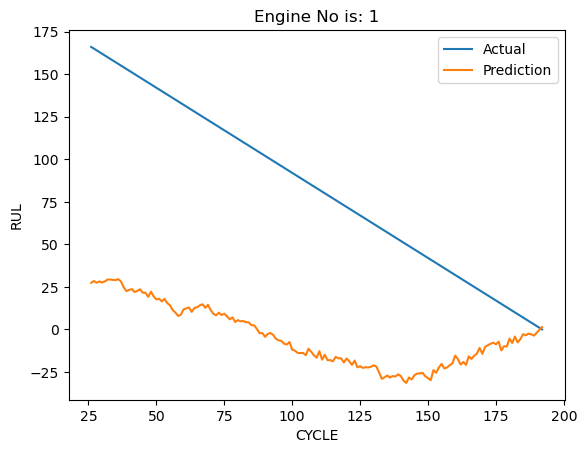

In [25]:
plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
plt.plot(rev_trans[0],rev_trans[13])
plt.ylabel('RUL')
plt.xlabel('CYCLE')
plt.title('Engine No is: {}'.format(engine_id))
plt.legend([ 'Actual','Prediction'], loc='upper right')
plt.show()
print('\n')

Shape of df for engine 18:  (195, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(170,) (170,)
RMSE on This set: 116.73301901096843


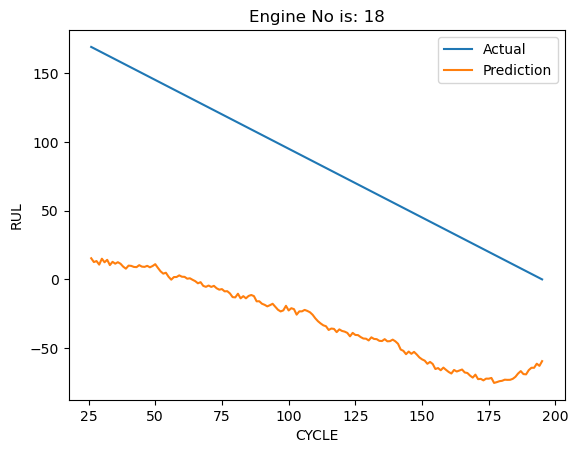



Shape of df for engine 13:  (163, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(138,) (138,)
RMSE on This set: 70.24317959019544


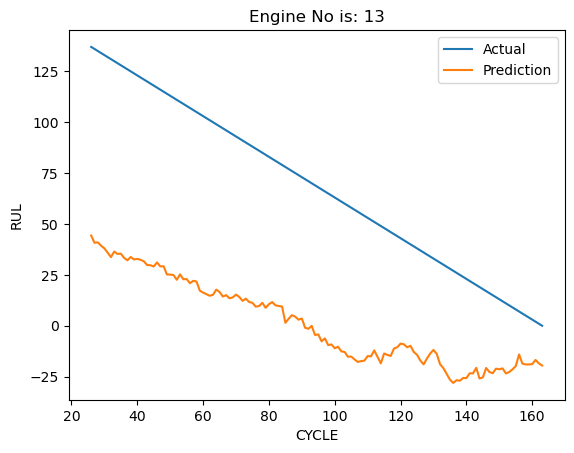



Shape of df for engine 14:  (180, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(155,) (155,)
RMSE on This set: 78.95405072604675


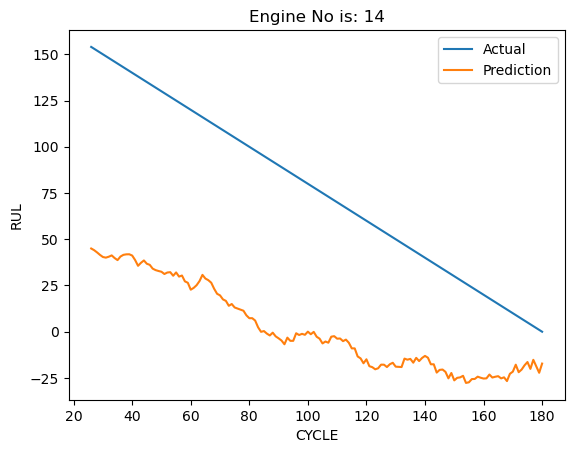



Shape of df for engine 47:  (214, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(189,) (189,)
RMSE on This set: 107.64215337416393


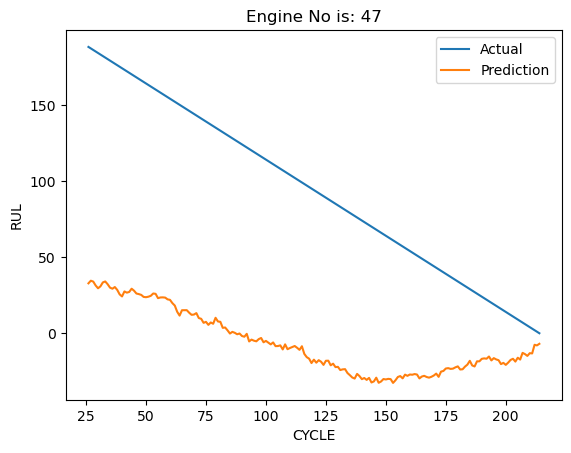



Shape of df for engine 5:  (269, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(244,) (244,)
RMSE on This set: 145.05104123661707


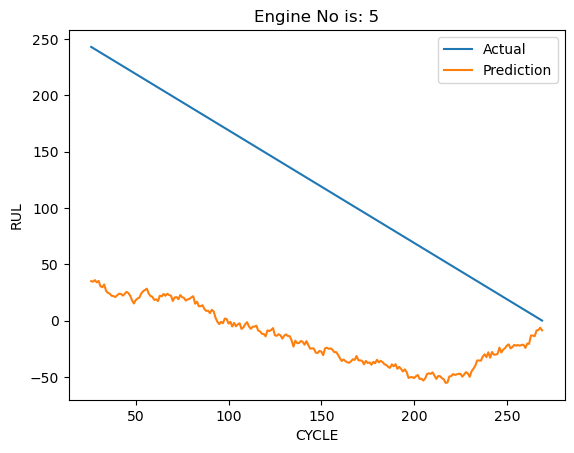



Shape of df for engine 6:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(163,) (163,)
RMSE on This set: 89.82258571253627


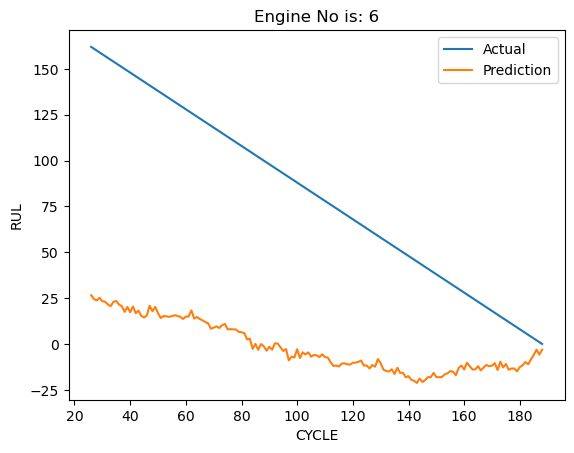



Shape of df for engine 25:  (230, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(205,) (205,)
RMSE on This set: 105.82953834115733


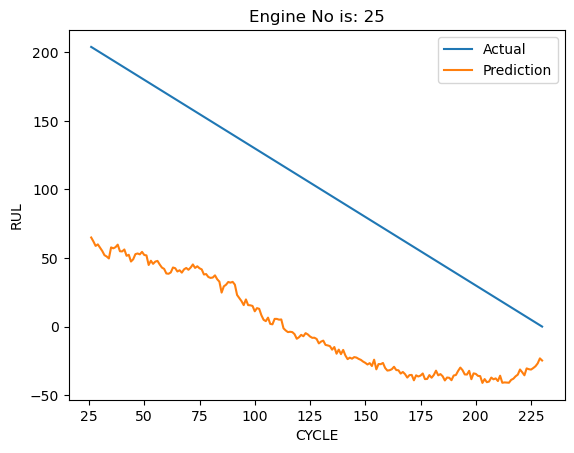



Shape of df for engine 33:  (200, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(175,) (175,)
RMSE on This set: 107.28511537493962


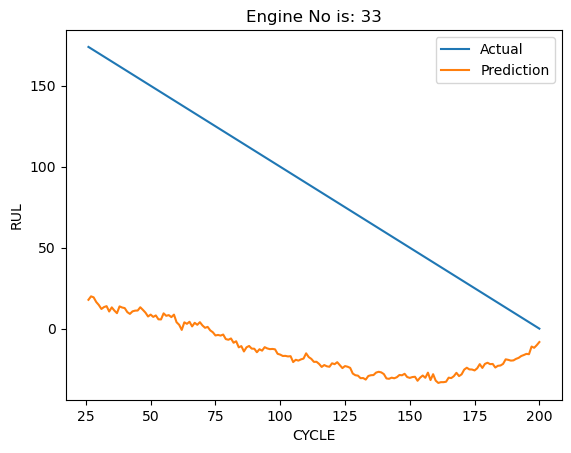



Shape of df for engine 36:  (158, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(133,) (133,)
RMSE on This set: 73.82242541656265


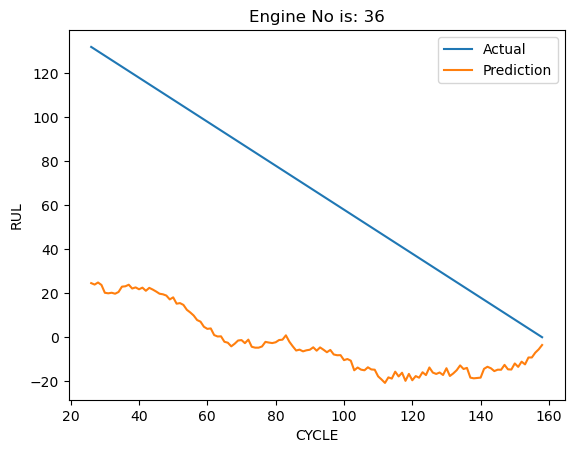



Shape of df for engine 34:  (195, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(170,) (170,)
RMSE on This set: 91.9166160351644


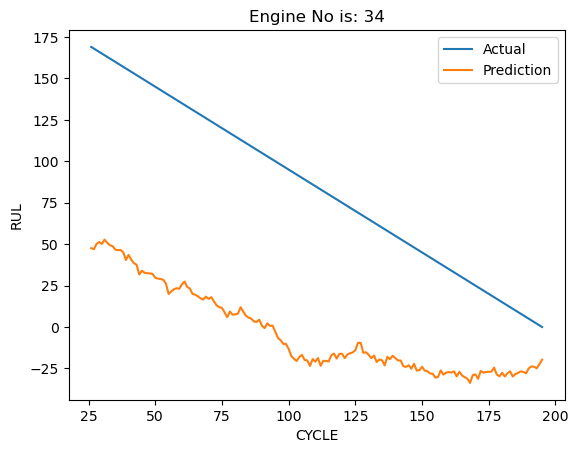



Shape of df for engine 10:  (222, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(197,) (197,)
RMSE on This set: 113.26763594552527


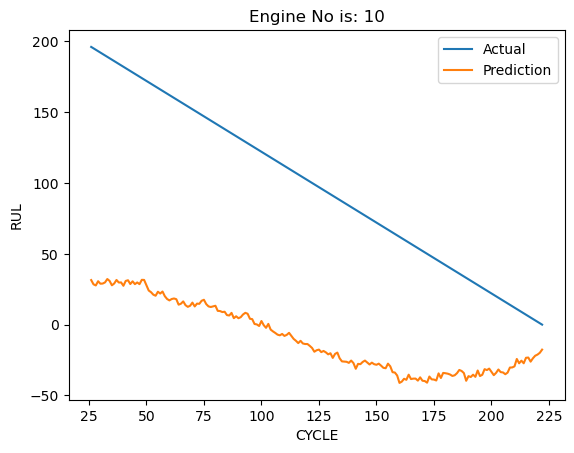



Shape of df for engine 2:  (287, 14)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(262,) (262,)
RMSE on This set: 148.80680678698374


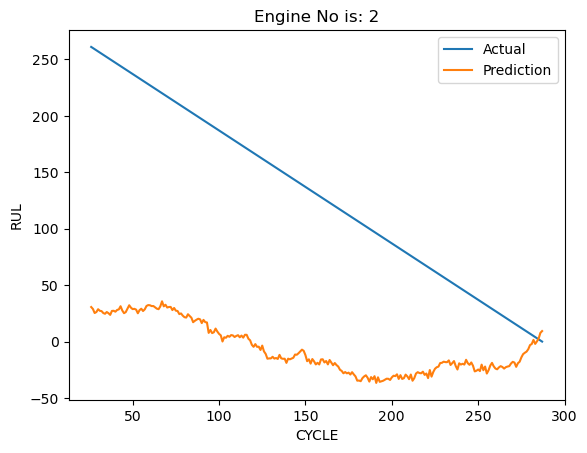



Shape of df for engine 41:  (216, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(191,) (191,)
RMSE on This set: 100.6789382138767


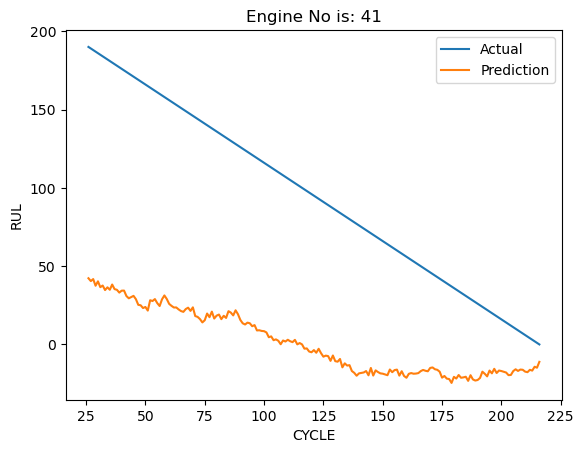



Shape of df for engine 32:  (191, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(166,) (166,)
RMSE on This set: 82.5047216113985


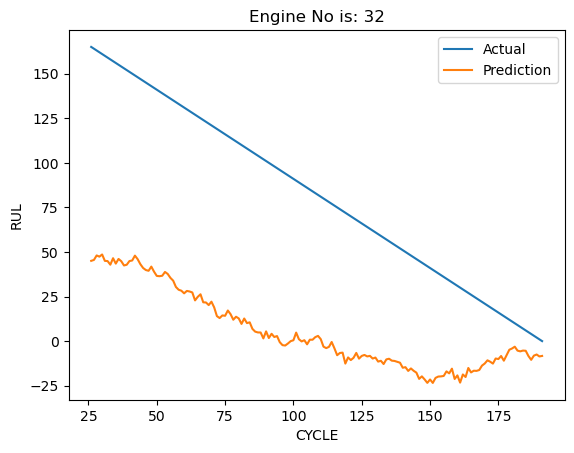



Shape of df for engine 37:  (170, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(145,) (145,)
RMSE on This set: 85.44657335245263


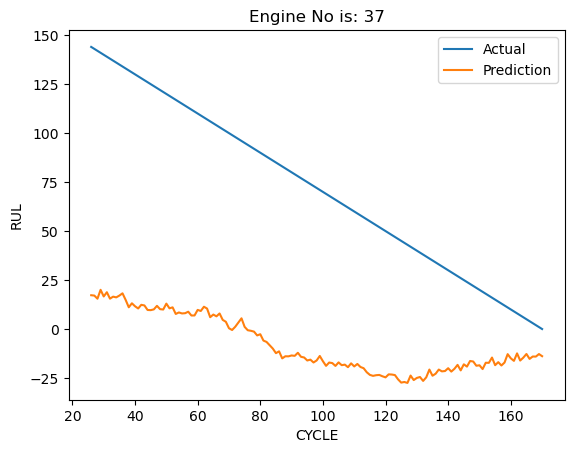



Shape of df for engine 34:  (195, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(170,) (170,)
RMSE on This set: 91.9166160351644


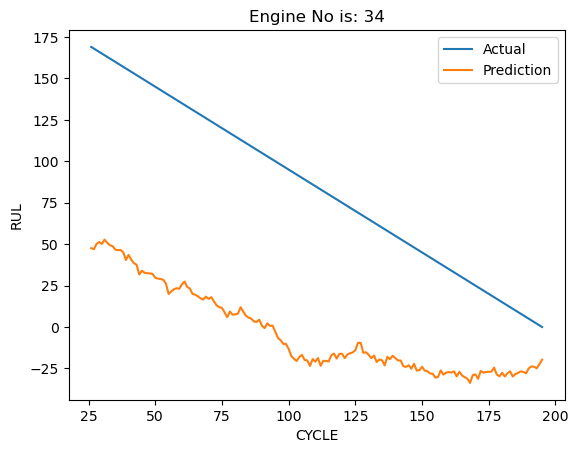



Shape of df for engine 40:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(163,) (163,)
RMSE on This set: 80.59415230471555


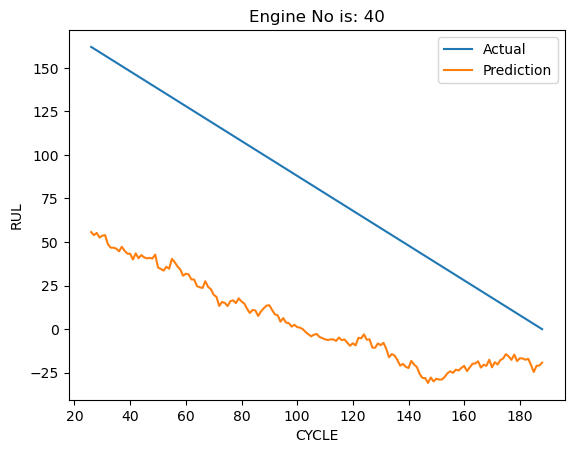



Shape of df for engine 41:  (216, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(191,) (191,)
RMSE on This set: 100.6789382138767


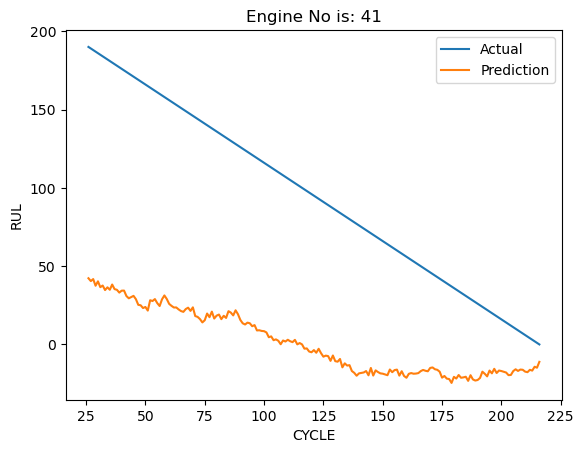



Shape of df for engine 38:  (194, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(169,) (169,)
RMSE on This set: 85.09931925371065


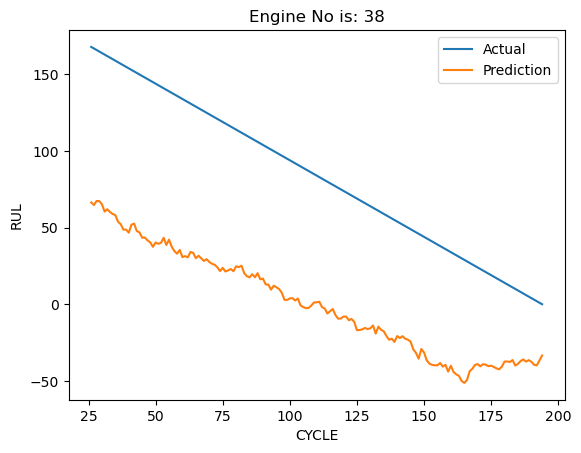



Shape of df for engine 6:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(163,) (163,)
RMSE on This set: 89.82258571253627


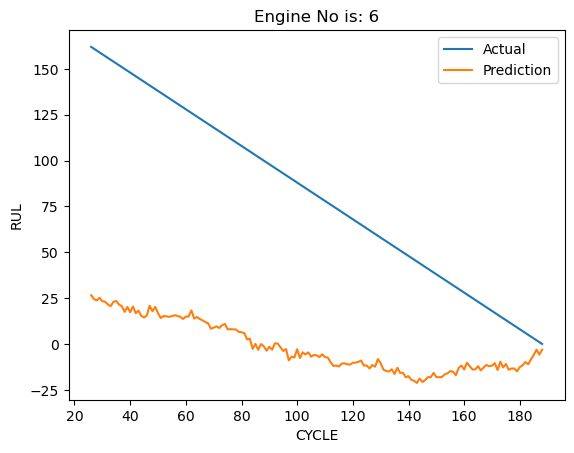



Shape of df for engine 47:  (214, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(189,) (189,)
RMSE on This set: 107.64215337416393


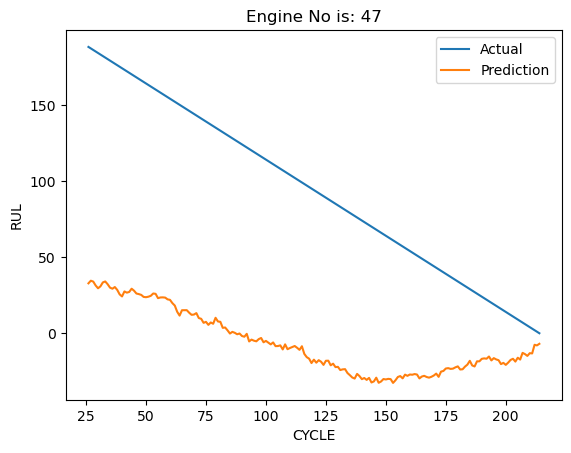



Shape of df for engine 48:  (231, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(206,) (206,)
RMSE on This set: 134.2884910858394


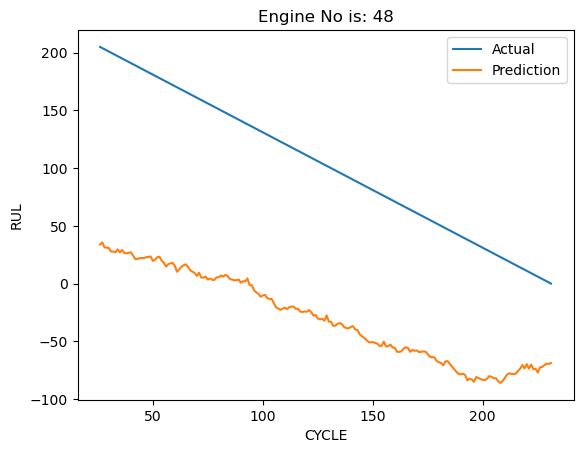



Shape of df for engine 40:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(163,) (163,)
RMSE on This set: 80.59415230471555


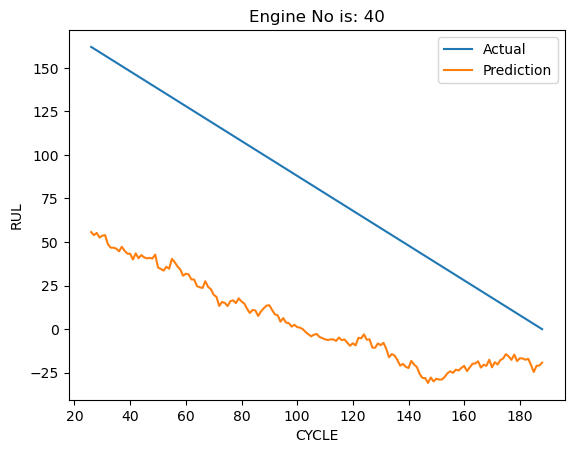



Shape of df for engine 47:  (214, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(189,) (189,)
RMSE on This set: 107.64215337416393


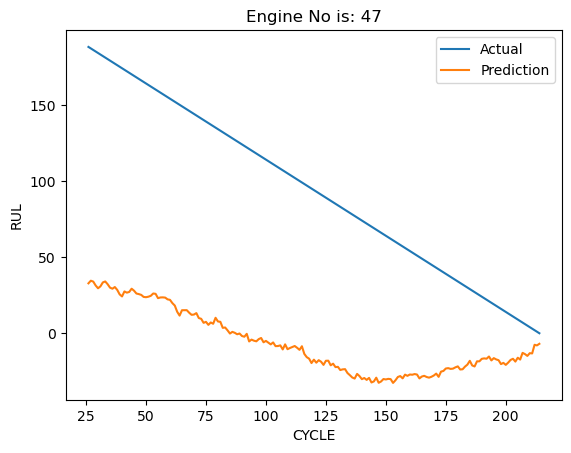



Shape of df for engine 17:  (276, 14)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
(251,) (251,)
RMSE on This set: 149.9202964060364


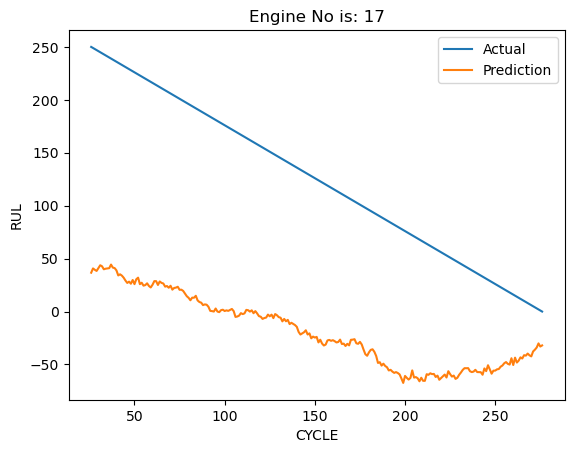

In [26]:
Train_no=1

m = np.random.randint(low=1,high=50,size=25) 

for i in m:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    
    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])
    print(df_actual['RUL'][win_length:].shape, rev_trans[13].shape)


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title(f'Engine No is: {engine_id}')
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

# Predict on Test data

Shape of df for engine 85:  (347, 14)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 12.215349675243333


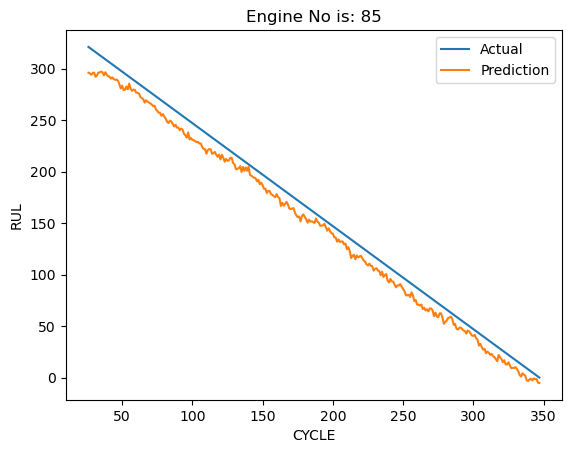



Shape of df for engine 68:  (185, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 1.624422002932195


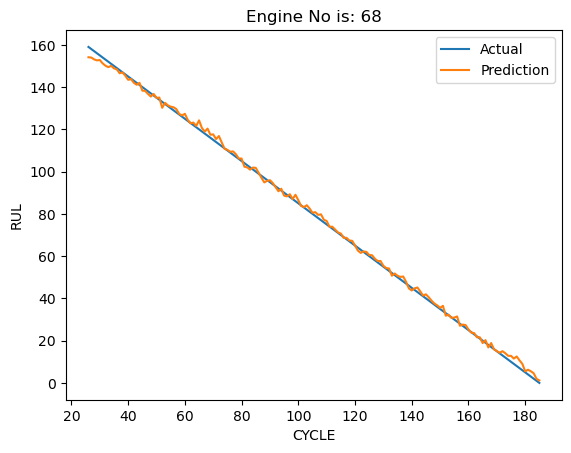



Shape of df for engine 97:  (145, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.9550886239771654


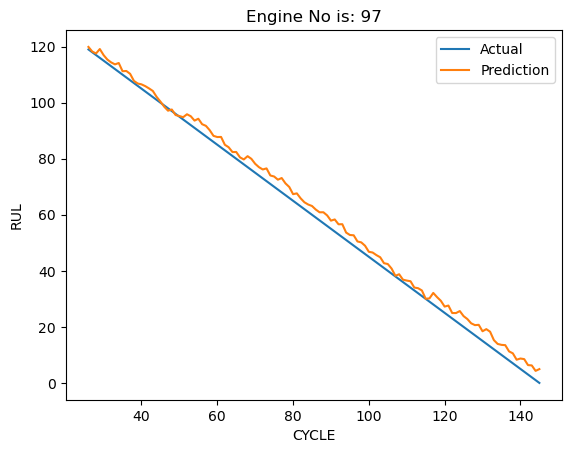



Shape of df for engine 79:  (181, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.101036566839011


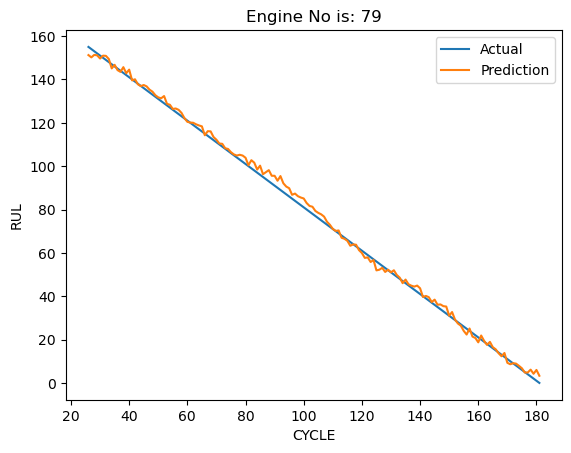



Shape of df for engine 61:  (218, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE on This set: 3.842836720291283


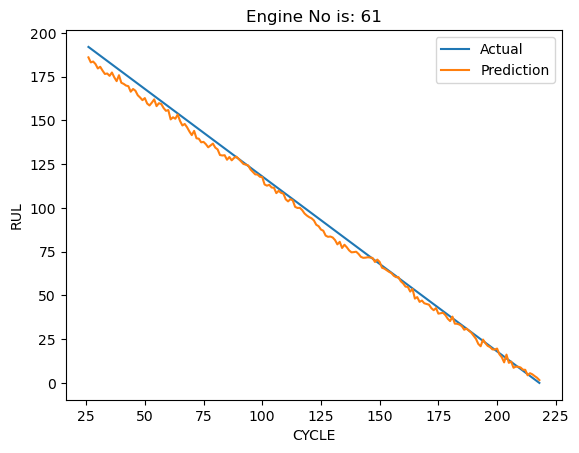



Shape of df for engine 75:  (231, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 4.761056984363284


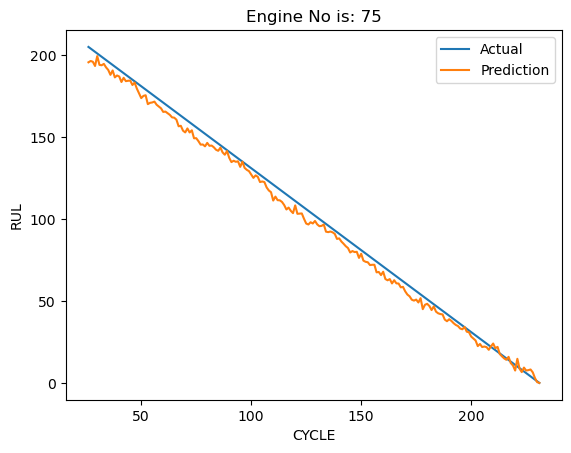



Shape of df for engine 95:  (198, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 3.0558539031814185


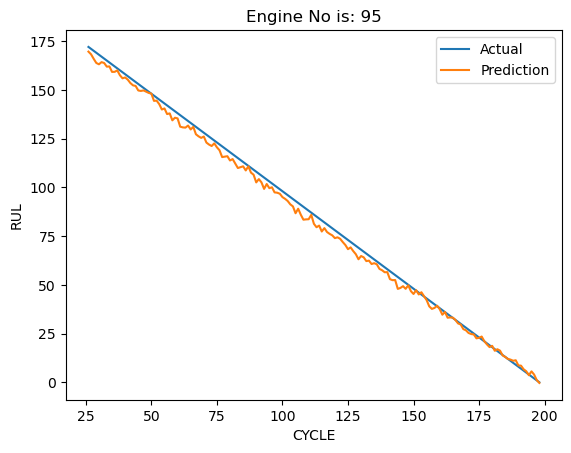



Shape of df for engine 78:  (161, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.790258967150184


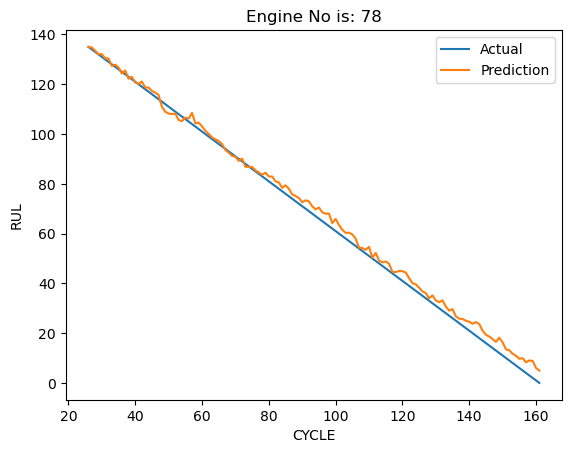



Shape of df for engine 87:  (170, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.1349613279856965


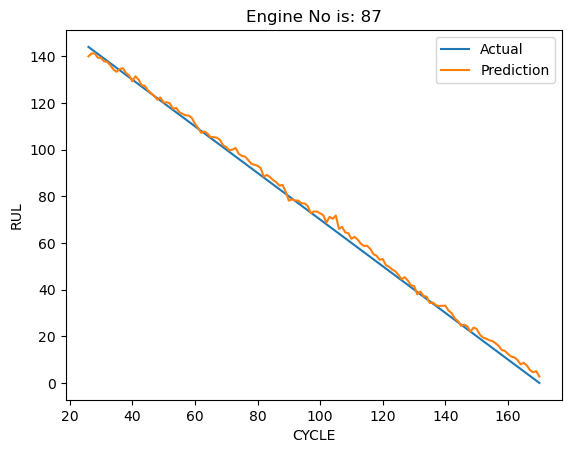



Shape of df for engine 75:  (231, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 4.761056984363284


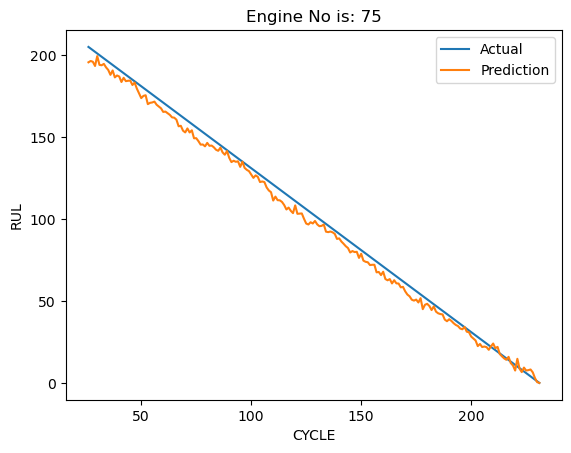



Shape of df for engine 81:  (288, 14)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 8.47077983161815


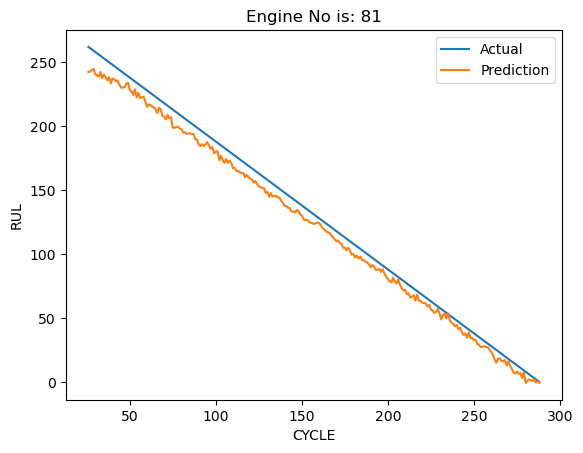



Shape of df for engine 87:  (170, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.1349613279856965


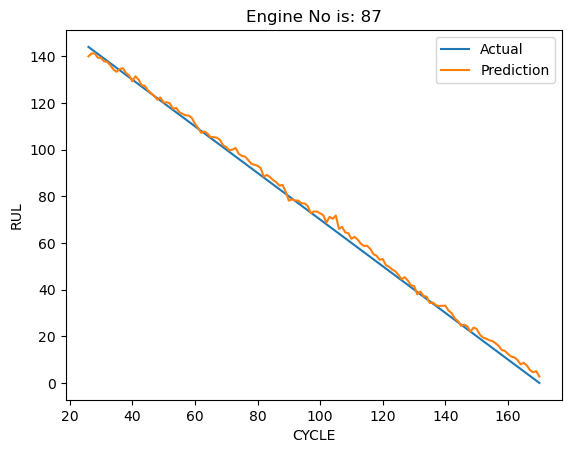



Shape of df for engine 86:  (190, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 1.872861587647434


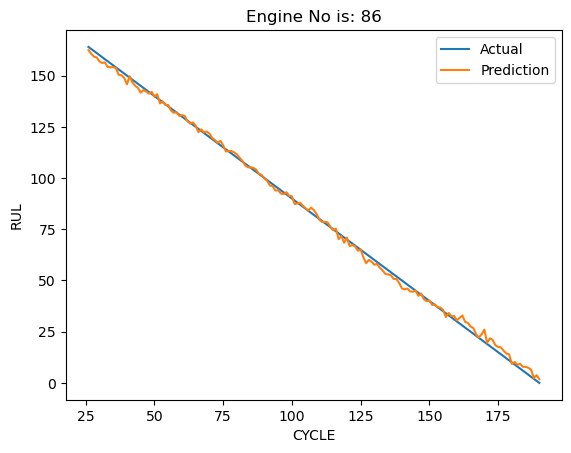



Shape of df for engine 90:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.238128074483841


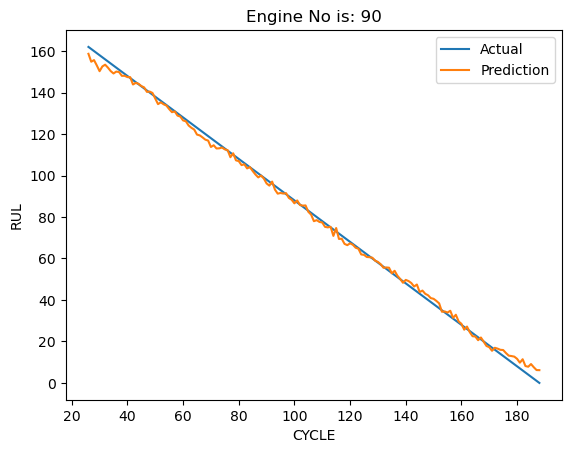



Shape of df for engine 63:  (168, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.1094460398261847


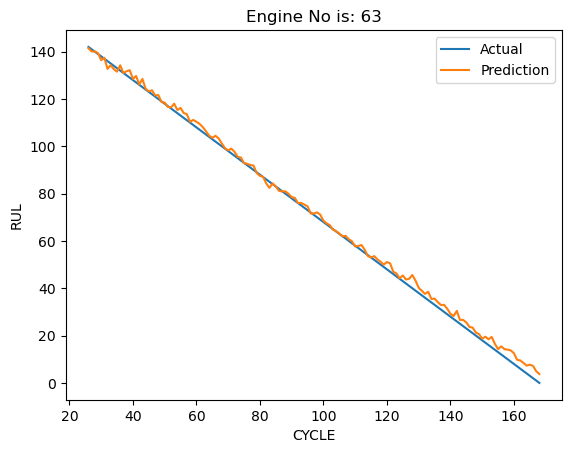



Shape of df for engine 92:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.296171242826728


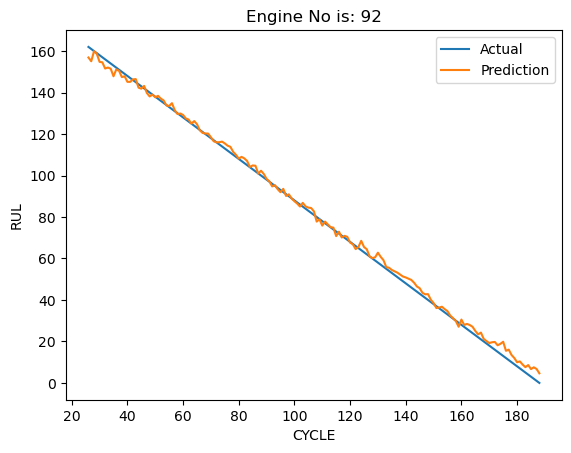



Shape of df for engine 65:  (206, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.6635990894508987


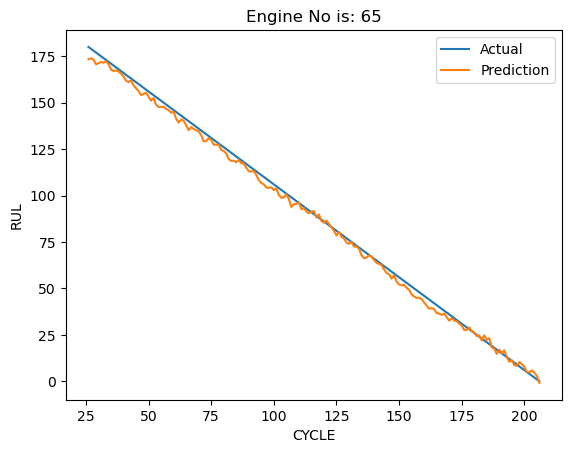



Shape of df for engine 95:  (198, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 3.0558539031814185


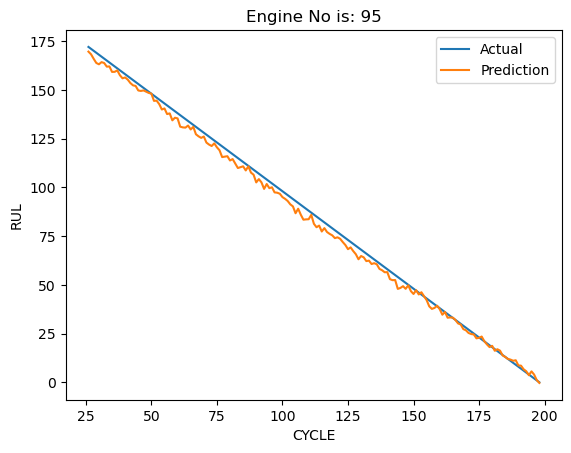



Shape of df for engine 89:  (188, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 1.6391981226720418


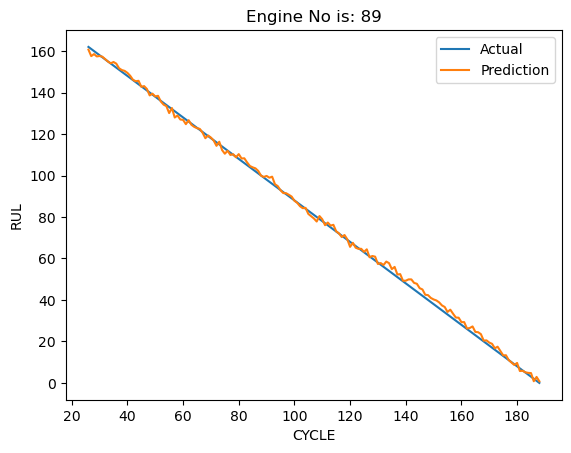



Shape of df for engine 88:  (365, 14)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 13.832895136449725


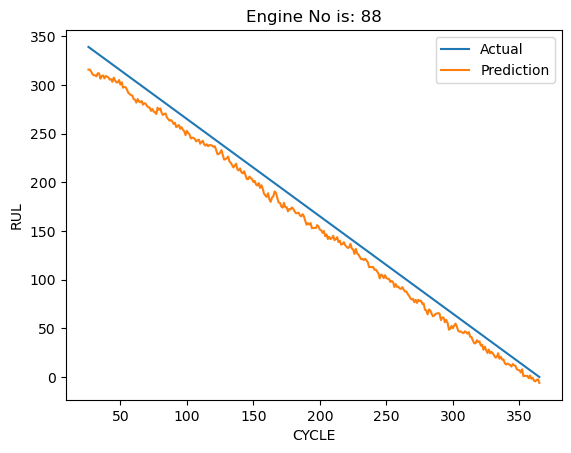



Shape of df for engine 62:  (184, 14)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.7579322670859616


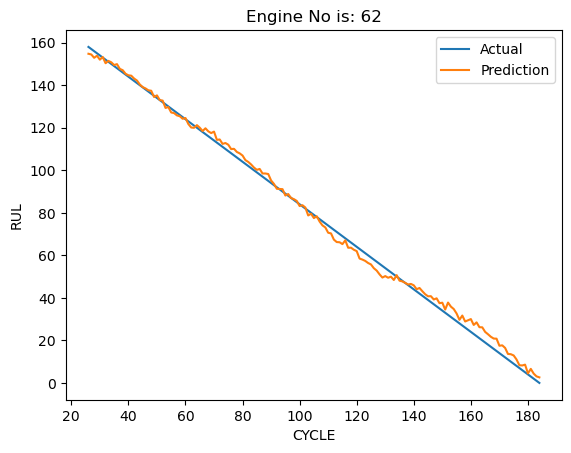



Shape of df for engine 65:  (206, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.6635990894508987


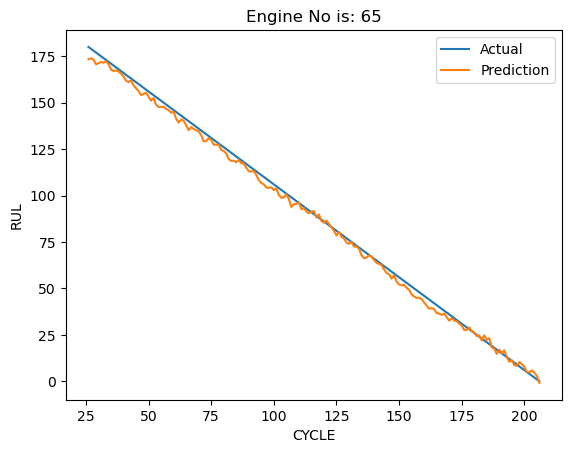



Shape of df for engine 71:  (194, 14)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.2106445526538203


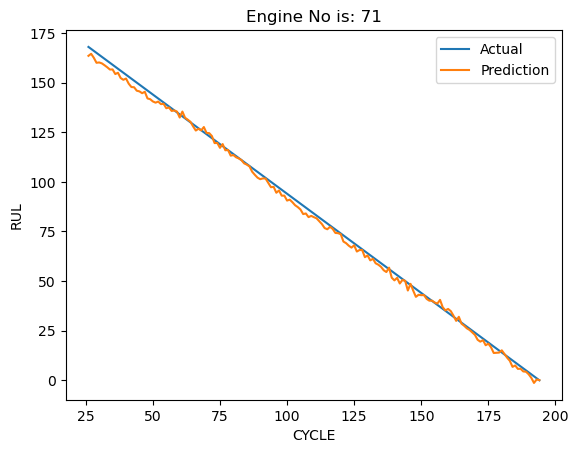



Shape of df for engine 76:  (244, 14)
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 4.0896321876950745


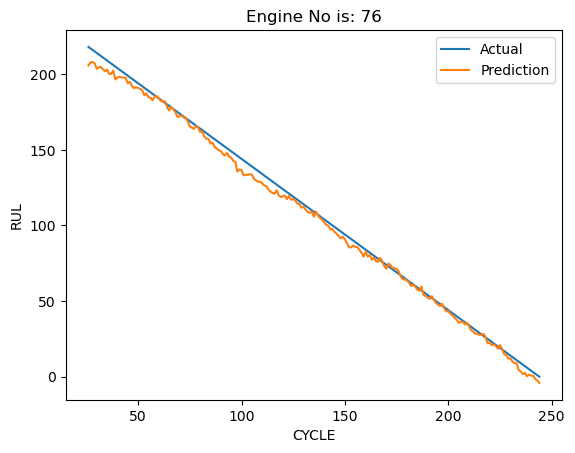



Shape of df for engine 97:  (145, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE on This set: 2.9550886239771654


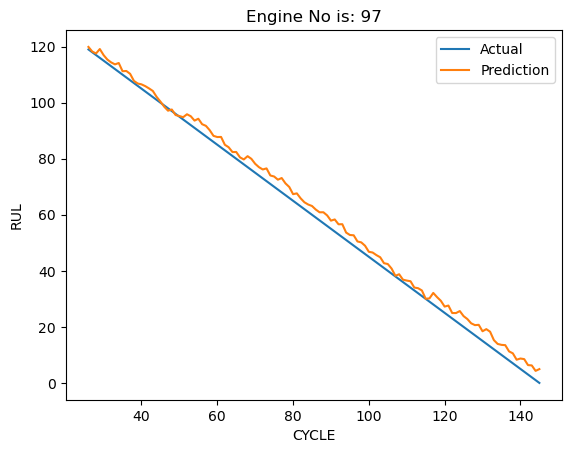

In [28]:
Train_no=2

n = np.random.randint(low=61,high=100,size=25) 

for i in n:    
    engine_id=i
    X,y,scaler,features=Data_format_conversion(Train_no,engine_id) 

    prediction=model.predict(X) ######### prediction on trained data
    rev_trans =pd.concat([pd.DataFrame(features[win_length:]),pd.DataFrame(prediction)],axis=1)
    rev_trans = scaler.inverse_transform(rev_trans)######## Transforming back to original scale
    rev_trans =pd.DataFrame(rev_trans)

    df=pd.read_csv("Processed_Train_00{}.csv".format(Train_no))
    df = df[df['ID']==engine_id]
    df_actual = df.drop(columns=['ID'])


    print('RMSE on This set:', np.sqrt(metrics.mean_squared_error(df_actual['RUL'][win_length:],rev_trans[13])))

    plt.plot(df_actual['Cycle'][win_length:],df_actual['RUL'][win_length:])
    plt.plot(rev_trans[0],rev_trans[13])
    plt.ylabel('RUL')
    plt.xlabel('CYCLE')
    plt.title(f'Engine No is: {engine_id}')
    plt.legend([ 'Actual','Prediction'], loc='upper right')
    plt.show()
    print('\n')

In [29]:
# save model and architecture to single file
model.save("model_1.h5")
print("Saved model to disk")

Saved model to disk
